In [1]:
# Visualize time series data using a box plot. These box plots should show how the values are 
# distributed within a given year or month and how it compares over time. The title of the 
# first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should 
# be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" 
# and the x and x axis are labeled correctly.

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/home/chaudha4/Projects/pyprojects/python-projects/data_analysis/ch04-time-series-visualizer/fcc-forum-pageviews.csv",
              parse_dates=True,
              index_col=0)

In [9]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [8]:
df1 = df [(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]
df1.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [10]:
# Explicitly copy so that pandas knows that we don't intend to update df1. 
# Otherwise you get SettingWithCopyWarning

df_box = df1.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')

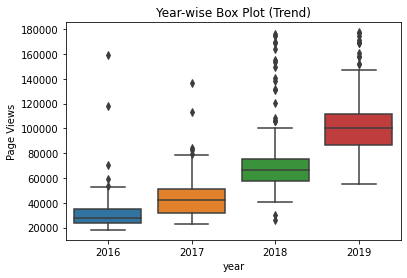

In [25]:
# Draw box plots (using Seaborn)
ax = sns.boxplot(x=df_box.year, y=df_box.value, data=df_box)
ax.set_ylabel('Page Views')
ax.set_title("Year-wise Box Plot (Trend)")


Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')

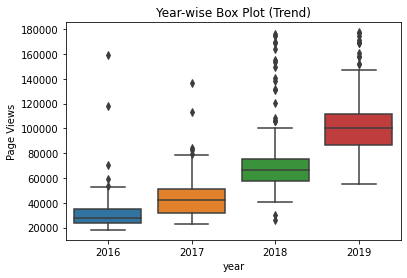

In [27]:
ax = sns.boxplot(x="year", y="value", data=df_box)
ax.set_ylabel('Page Views')
ax.set_title("Year-wise Box Plot (Trend)")

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

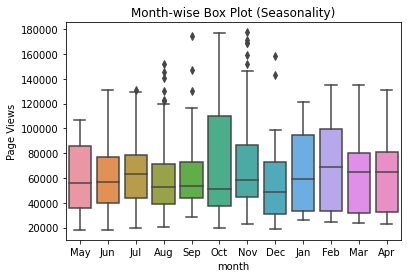

In [65]:

ax = sns.boxplot(x="month", y="value", data=df_box, hue_order="month")
ax.set_ylabel('Month')
ax.set_ylabel('Page Views')
ax.set_title("Month-wise Box Plot (Seasonality)")

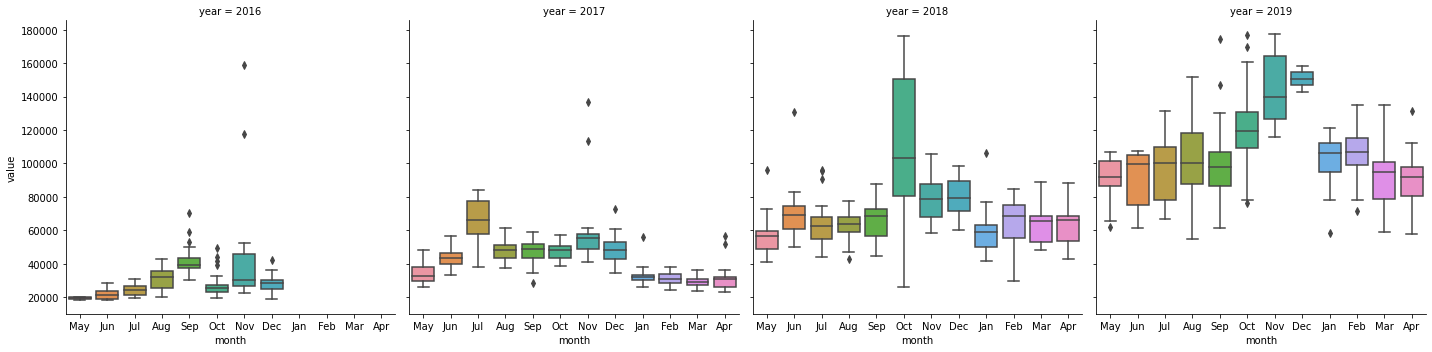

In [31]:
# Returns the FacetGrid object with the plot on it for further tweaking.
g = sns.catplot(x="month", y="value", data=df_box, col="year", kind="box")

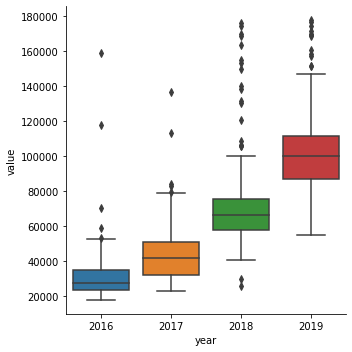

In [42]:
g = sns.catplot(x="year", y="value", data=df_box, kind="box")

In [78]:
mm = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

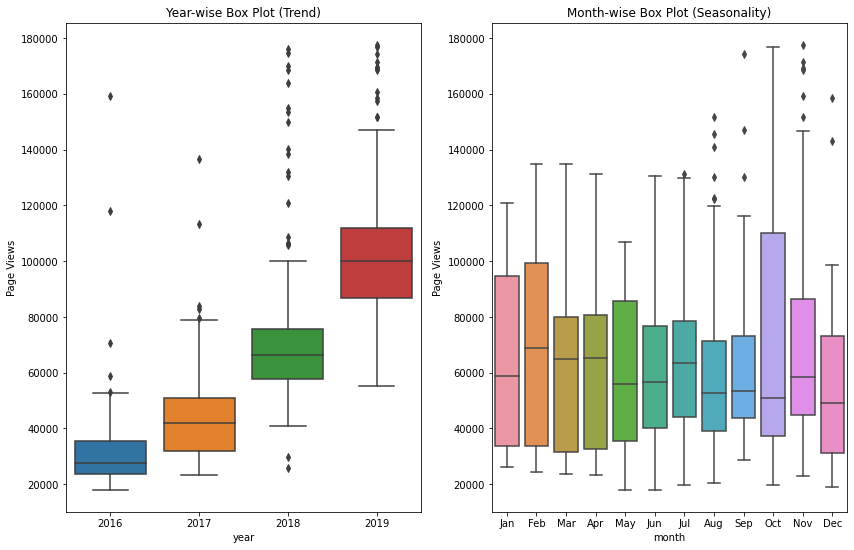

In [85]:

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14, 9)

sns.boxplot(x="year", y="value", data=df_box, ax=ax[0])
sns.boxplot(x="month", y="value", data=df_box, ax=ax[1], order=mm)

ax[0].set_ylabel('Year')
ax[0].set_ylabel('Page Views')
ax[0].set_title("Year-wise Box Plot (Trend)")

ax[1].set_ylabel('Month')
ax[1].set_ylabel('Page Views')
ax[1].set_title("Month-wise Box Plot (Seasonality)")



